In [1]:
from tms_risk.utils.data import Subject, get_all_subject_ids, get_tms_conditions, get_subjects
from tqdm.notebook import tqdm
import pandas as pd
import pingouin as pg
import seaborn as sns
import numpy as np
import os.path as op
import seaborn as sns

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
subjects = get_subjects(all_tms_conditions=True)

# cvr2

In [3]:
import pandas as pd
from pathlib import Path
from nilearn.maskers import NiftiMasker

data = []
keys = []
for sub in subjects:
    mask = sub.get_volume_mask(session=1, roi='NPCr2cm-cluster', epi_space=True)
    masker = NiftiMasker(mask)
    for model in [0, 1, 2]:
        cvr2_fn = Path(sub.bids_folder) / 'derivatives' / f'encoding_model2.model-{model}.smoothed.cv' / f'sub-{sub.subject}' / f'sub-{sub.subject}_desc-cvr2.optim_space-T1w_pars.nii.gz'
        if not cvr2_fn.exists():
            print(f'  Missing cvr2 for subject {sub.subject} model {model}')
        else:
            cvr2_data = pd.Series(masker.fit_transform(str(cvr2_fn)))
            data.append(cvr2_data)
            keys.append((sub.subject, 'cvr2', model))

# Create the DataFrame with the MultiIndex
df_cvr2 = pd.concat(data, keys=keys, names=['subject', 'parameter', 'model', 'voxel']).to_frame('cvr2')

  Missing cvr2 for subject 01 model 2
  Missing cvr2 for subject 02 model 2
  Missing cvr2 for subject 03 model 2
  Missing cvr2 for subject 04 model 2
  Missing cvr2 for subject 05 model 2
  Missing cvr2 for subject 06 model 2
  Missing cvr2 for subject 07 model 2
  Missing cvr2 for subject 09 model 2
  Missing cvr2 for subject 10 model 2
  Missing cvr2 for subject 11 model 2
  Missing cvr2 for subject 18 model 2
  Missing cvr2 for subject 19 model 2
  Missing cvr2 for subject 21 model 2
  Missing cvr2 for subject 25 model 2
  Missing cvr2 for subject 26 model 2
  Missing cvr2 for subject 29 model 2
  Missing cvr2 for subject 30 model 2
  Missing cvr2 for subject 31 model 2
  Missing cvr2 for subject 34 model 2
  Missing cvr2 for subject 35 model 2
  Missing cvr2 for subject 36 model 2
  Missing cvr2 for subject 37 model 2
  Missing cvr2 for subject 45 model 2
  Missing cvr2 for subject 46 model 2
  Missing cvr2 for subject 47 model 2
  Missing cvr2 for subject 50 model 2
  Missing cv

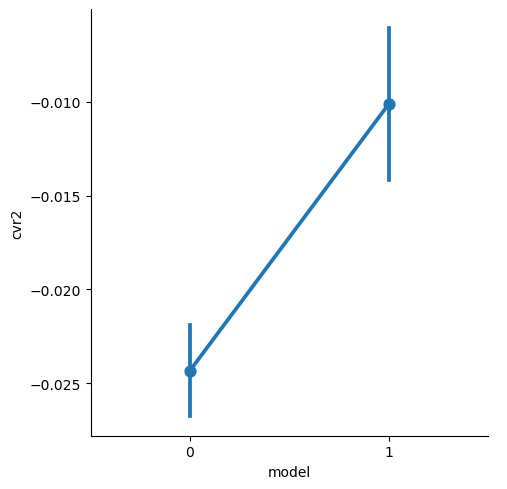

In [4]:
sns.catplot(data=df_cvr2.groupby(['subject', 'model']).mean().reset_index(), x='model', y='cvr2', kind='point', errorbar='se')

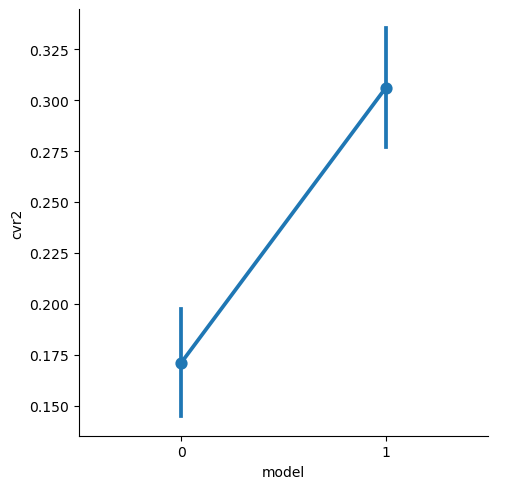

In [5]:
sns.catplot(data=df_cvr2.groupby(['subject', 'model']).apply(lambda x: (x>0.0).mean()).reset_index(), x='model', y='cvr2', kind='point', errorbar='se')

In [6]:
pg.rm_anova(dv='cvr2', within='model', subject='subject', data=df_cvr2.groupby(['subject', 'model']).mean().reset_index(), detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,model,0.003519,1,0.003519,27.700259,0.000008,0.116928,1.0
1,Error,0.004319,34,0.000127,NaN,NaN,NaN,NaN


In [7]:
pg.rm_anova(dv='cvr2', within='model', subject='subject', data=df_cvr2.groupby(['subject', 'model']).apply(lambda x: (x>0.0).mean()).reset_index(), detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,model,0.318640,1,0.318640,64.742281,2.223932e-09,0.147572,1.0
1,Error,0.167337,34,0.004922,NaN,NaN,NaN,NaN


# Amplitude

In [8]:
df = []

for sub in tqdm(subjects):
    try:
        prf_params = sub.get_prf_parameters2(model_label=1, roi='NPCr2cm-cluster')
        df.append(prf_params)
    except Exception:
        print(f"PRF parameters not found for subject {sub.subject}, skipping.")

df = pd.concat(df, keys=[sub.subject for sub in subjects], names=['subject'])

  0%|          | 0/35 [00:00<?, ?it/s]

In [10]:
tms_conditions = get_tms_conditions()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_32427/1516226399.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tmp = df[['amplitude']].stack(1)


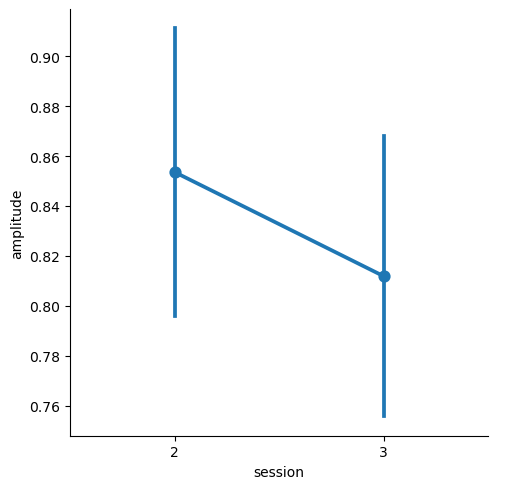

In [11]:
import seaborn as sns
tmp = df[['amplitude']].stack(1)

tmp['tms_condition'] = tmp.apply(lambda row: tms_conditions[row.name[0]][row.name[2]], axis=1)

sns.catplot(data=tmp.groupby(['subject', 'session', 'tms_condition']).mean().reset_index(), x='session', y='amplitude', kind='point', errorbar='se')

In [12]:
df.groupby(['subject']).apply(lambda d: (d[('cvr2', None)] > 0.0).mean())

subject
01    0.226829
02    0.135922
03    0.168350
04    0.323699
05    0.589226
06    0.277397
07    0.371622
09    0.147541
10    0.281106
11    0.554140
18    0.273723
19    0.273077
21    0.145455
25    0.690678
26    0.149780
29    0.331307
30    0.207756
31    0.327869
34    0.207071
35    0.294118
36    0.139535
37    0.234568
45    0.591160
46    0.614286
47    0.087302
50    0.128972
53    0.208571
56    0.108197
59    0.696275
62    0.292593
63    0.395745
67    0.094737
69    0.413712
72    0.393204
74    0.337596
dtype: float64

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_32427/2515899215.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tmp = df[['amplitude']].stack(1)


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,tms_condition,0.378414,1,0.378414,7.601483,0.009312,0.048965,1.0
1,Error,1.692573,34,0.049782,NaN,NaN,NaN,NaN


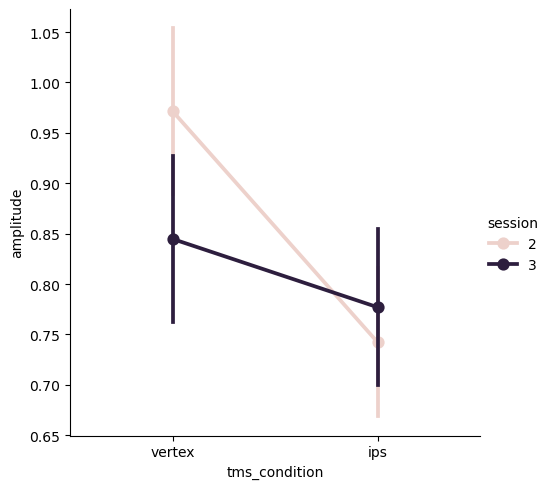

In [13]:
import seaborn as sns
tmp = df[['amplitude']].stack(1)

tmp['tms_condition'] = tmp.apply(lambda row: tms_conditions[row.name[0]][row.name[2]], axis=1)

sns.catplot(data=tmp.groupby(['subject', 'session', 'tms_condition']).mean().reset_index(), x='tms_condition', y='amplitude', hue='session', kind='point', errorbar='se')

import pingouin as pg

aov = pg.rm_anova(dv='amplitude', within='tms_condition', subject='subject', data=tmp.groupby(['subject', 'tms_condition']).mean().reset_index(), detailed=True)
# aov = pg.mixed_anova(dv='amplitude', within='tms_condition', between='session', subject='subject', data=tmp.groupby(['subject', 'session', 'tms_condition']).mean().reset_index())
aov

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_32427/1010620168.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tmp = df[df[('cvr2', None)] > 0.0][['amplitude']].stack(1)


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,tms_condition,0.844018,1,0.844018,5.117588,0.03019,0.049057,1.0
1,Error,5.607448,34,0.164925,NaN,NaN,NaN,NaN


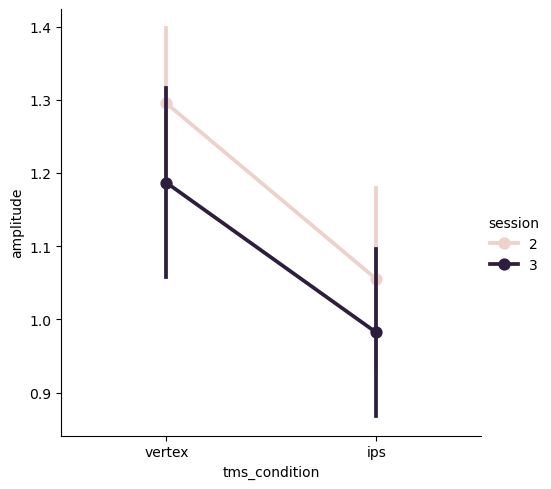

In [14]:
import seaborn as sns
tmp = df[df[('cvr2', None)] > 0.0][['amplitude']].stack(1)

tmp['tms_condition'] = tmp.apply(lambda row: tms_conditions[row.name[0]][row.name[2]], axis=1)

sns.catplot(data=tmp.groupby(['subject', 'session', 'tms_condition']).mean().reset_index(), x='tms_condition', y='amplitude', hue='session', kind='point', errorbar='se')

import pingouin as pg

aov = pg.rm_anova(dv='amplitude', within='tms_condition', subject='subject', data=tmp.groupby(['subject', 'tms_condition']).mean().reset_index(), detailed=True)
# aov = pg.mixed_anova(dv='amplitude', within='tms_condition', between='session', subject='subject', data=tmp.groupby(['subject', 'session', 'tms_condition']).mean().reset_index())
aov

# Comparison to fully free model

In [15]:
import seaborn as sns
tmp = df[df[('cvr2', None)] > 0.0][['amplitude']].stack(1)
tmp['stimulation_condition'] = tmp.apply(lambda row: tms_conditions[row.name[0]][row.name[2]], axis=1)

tmp = tmp.set_index('stimulation_condition', append=True).groupby(['stimulation_condition', 'subject']).mean().unstack('stimulation_condition').droplevel(0, axis=1)

diff2 = tmp['ips'] - tmp['vertex']

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_32427/648506044.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tmp = df[df[('cvr2', None)] > 0.0][['amplitude']].stack(1)


In [16]:
import arviz as az
from tms_risk.cogmodels.fit_model import build_model, get_data
import os.path as op
import numpy as np

bids_folder = '/data/ds-tmsrisk'

# Some convenience functions
def get_info(model_label, bids_folder='/data/ds-tmsrisk'):

    df = get_data(model_label=model_label, bids_folder=bids_folder)
    model = build_model(df=df, model_label=model_label)
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

    return df, model, idata

conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

model_label = 'flexible2'

df, model, idata = get_info(model_label)
model.build_estimation_model()
curves = model.get_sd_curve(conditions, idata=idata, x=np.arange(7, 50), variable='both', group=False)
mean_noise = curves.groupby(['stimulation_condition', 'x', 'subject']).mean()


In [30]:
diff = mean_noise.xs(slice(7, 14), level='x', drop_level=False)['perceptual_noise_sd'].unstack('stimulation_condition')
diff = diff['ips'] - diff['vertex']
diff

x   subject
7   1          0.358327
    2          0.593017
    3          0.313891
    4          0.501168
    5          0.347358
                 ...   
14  63         0.446509
    67         0.322230
    69         0.340295
    72         0.451068
    74         0.122050
Length: 280, dtype: float64

In [38]:
diff2.index = diff2.index.astype(int)
diff2.to_frame('amplitude reduction').join(diff.groupby('subject').mean().to_frame('cognitive_noise'))

,amplitude reduction,cognitive_noise
subject,,
1,-0.618880,0.343745
2,0.370774,0.450329
3,-0.493415,0.339192
4,0.958936,0.402480
5,-1.164571,0.343207
6,-0.995170,0.342186
7,-0.740728,0.418416
9,0.060972,0.281791
10,-0.669820,0.374489


In [ ]:
diff.g

x   subject
7   1          0.358327
    2          0.593017
    3          0.313891
    4          0.501168
    5          0.347358
                 ...   
14  63         0.446509
    67         0.322230
    69         0.340295
    72         0.451068
    74         0.122050
Length: 280, dtype: float64

In [42]:
diff = diff.to_frame('cognitive_noise').groupby('subject').mean().merge(diff2)

ValueError: Cannot merge a Series without a name

In [41]:
tmp = mean_noise.groupby(['subject', 'stimulation_condition']).mean()['perceptual_noise_sd'].unstack('stimulation_condition')

diff_cogntive_noise = tmp['ips'] - tmp['vertex']

In [18]:
diff2

subject
01   -0.618880
02    0.370774
03   -0.493415
04    0.958936
05   -1.164571
06   -0.995170
07   -0.740728
09    0.060972
10   -0.669820
11   -0.180485
18    0.281938
19   -0.053424
21    0.314097
25   -0.428934
26    0.553407
29   -0.222803
30    0.185561
31   -0.538169
34   -1.362722
35    0.014168
36   -0.499736
37    0.127982
45    0.379125
46    0.179676
47   -0.183809
50    0.461743
53   -0.160779
56   -1.642679
59    0.487037
62   -0.630861
63   -0.187158
67   -0.233777
69   -0.822264
72    0.103091
74   -0.334757
dtype: float32

In [7]:
sns.set(font_scale=1.6, font='Helvetica', style='white')
diff = mean_noise.xs(slice(7, 14), level='x', drop_level=False)['perceptual_noise_sd'].unstack('stimulation_condition')
diff = diff['ips'] - diff['vertex']
diff = diff.to_frame('cognitive_noise').groupby('subject').mean().merge(prf_diff.reset_index(), on='subject')

NameError: name 'prf_diff' is not defined

In [115]:
import os.path as op
bids_folder = '/data/ds-tmsrisk'
prf_pars = pd.read_csv(op.join(bids_folder, 'derivatives', 'encoding_models', 'prf_parameters_thr.tsv'), sep='\t', index_col=[0,1,2,3]).droplevel(level=[1,2])
mean_prf_pars = prf_pars.groupby(['subject', 'stimulation_condition']).mean()

prf_diff = mean_prf_pars.unstack('stimulation_condition').swaplevel(axis=1)
prf_diff = prf_diff['ips'] - prf_diff['vertex']

<Axes: ylabel='amplitude'>

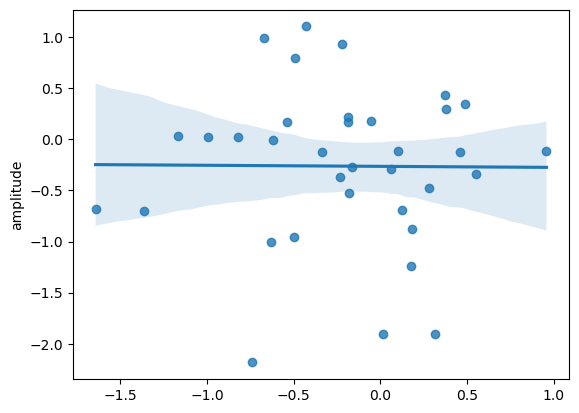

In [116]:
sns.regplot(x=diff2, y=prf_diff['amplitude'])